In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
usinp = (raw_input('-> '))#ввод имени, открываемого файла
#print "user input: ", type(usinp)


-> 21022017-1.dat


In [3]:
len_usinp = len(str(usinp))
#print type(len_usinp)
usinp_e = usinp[0:-4] + 'e' + usinp[-4:len_usinp]
#print usinp_e
#название файла без разширения, для отображения на граффике
usinp_title = usinp[0:-4]
#
s = open(usinp).read()#прочитали исходный файл

#блок замен
s = s.replace('"', '')#удаляем кавычки
s = s.replace('sec', '"sec"')#удаляем кавычки
s = s.replace('mA', '"mA"')#удаляем кавычки
s = s.replace('mV', '"mV"')#удаляем кавычки
s = s.replace('    ', '\t')#меняем запятую на точкуу
s = s.replace(',', '.')#меняем запятую на точкуу
#s = s.replace('\n', ', ')#замена новой строки на запятую
#s = s.replace(',', '\t')#замена запятой символом табуляции
#s = s.replace('.', ',')#замена точки заятой

#создаем новый файл для записывания в него изменений
f = open(usinp_e, 'w')#открыли файл (создали)
f.write(s)#записали
f.close()#закрыли

In [4]:
#создаем датафрэйм
frame = pd.read_csv(usinp_e, sep = "\t", header = None, names = ['sec', 'mA', 'mV'], skiprows = 1)

In [5]:
allarray = np.array(frame)
#print allarray
sec = np.array(frame['sec'])
#print x
ma = np.array(frame['mA'])
#print y
mv = np.array(frame['mV'])
#print mv
data = mv
#print x
#print type(data)

In [6]:
#зона вывода графф
plt.figure(num = 1, figsize=(10,6), dpi= 150)
plt.suptitle(usinp_title, fontsize=16)
plt.subplots_adjust(hspace=0.4)#
#первый графф
plt.subplot(2,1,1)
plt.plot(sec, ma)
plt.xlabel('time, sec')
plt.ylabel('I, mA')
plt.title(u'Изменение тока по времени', fontsize=12)
plt.grid(True)
#второй графф
plt.subplot(2,1,2)
plt.plot(mv, ma, '-r')
plt.xlabel('Volts, mV')
plt.ylabel('I, mA')
plt.title(u'Вольт-амперная характеристика', fontsize=12)
plt.grid(True)

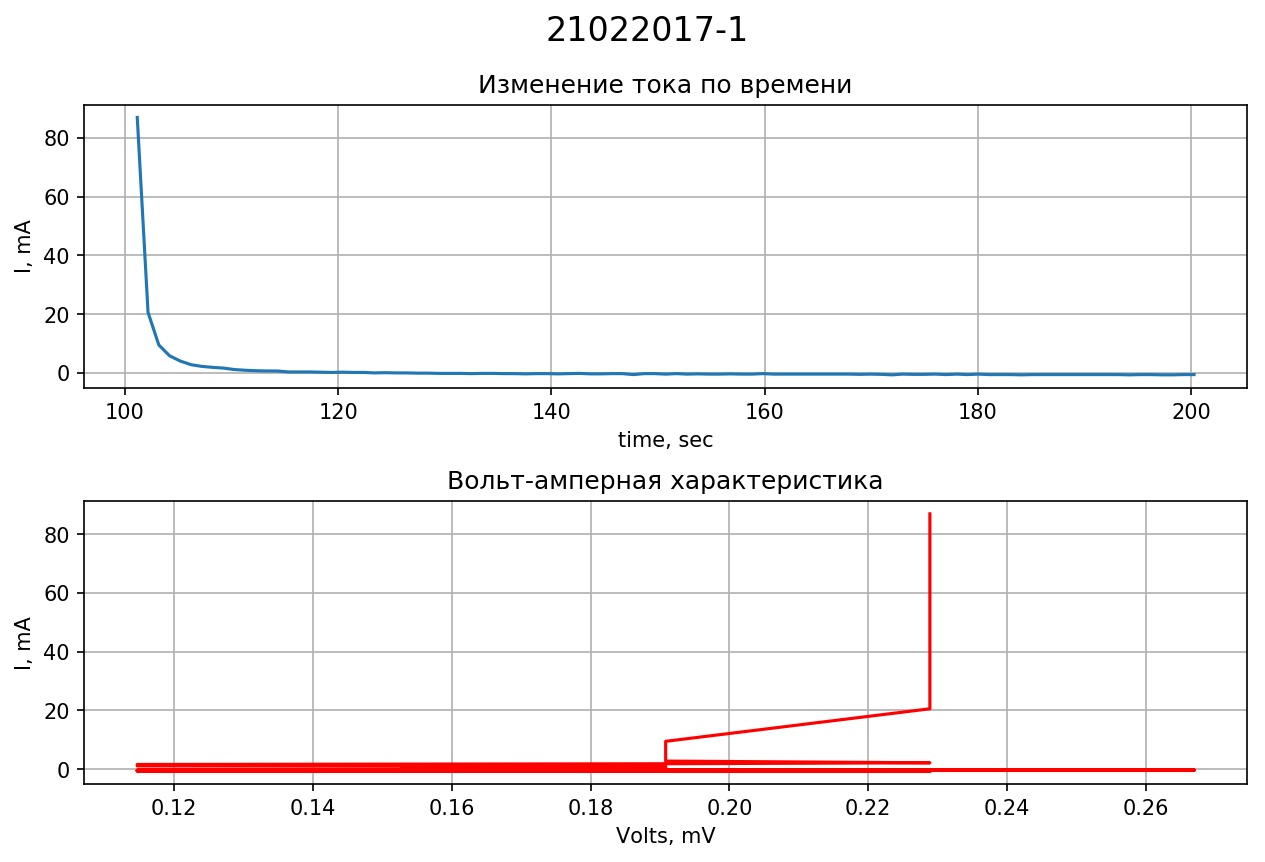

In [7]:
#вывод
plt.figure(1).savefig(usinp_title + 'e' + '.png')
plt.figure(1).savefig(usinp_title + 'e' + '.pdf')
plt.show()